In [1]:
from IPython.display import display, Image

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
import seaborn as sns
sns.set()

In [4]:
import dipy.sims.voxel as vox
import dipy.data as dpd
import dipy.viz.fvtk as fvtk
import dipy.core.sphere as sphere
import dipy.core.gradients as grad
import dipy.core.geometry as geo

In [5]:
s724 = dpd.get_sphere('symmetric724')

In [6]:
s724.x.shape

(724,)

In [7]:
gtab = grad.gradient_table(np.ones(s724.x.shape[0])*1000, bvecs=s724.vertices)

In [8]:
#image, gtab = dpd.read_stanford_hardi()

In [9]:
pi_4 = 10* np.pi/8

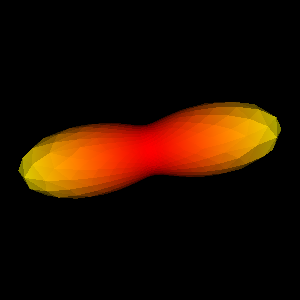

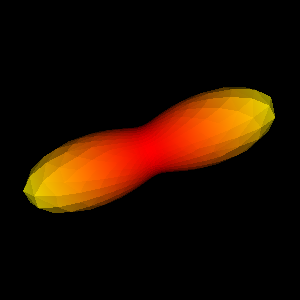

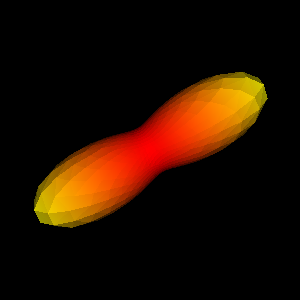

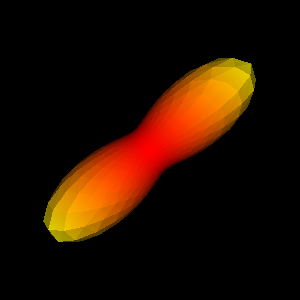

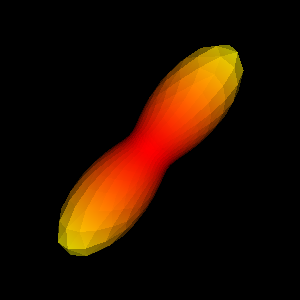

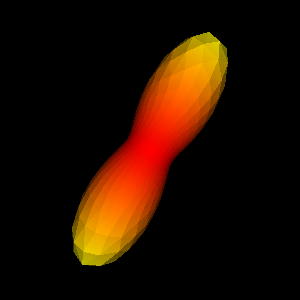

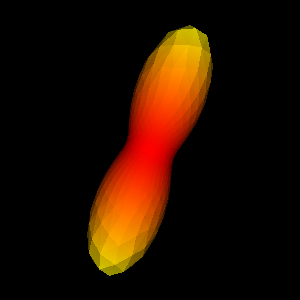

In [10]:
evecs = np.eye(3)

for ang in [10, 20, 30, 40, 50, 60, 70]:
    odf = vox.single_tensor_odf(gtab.bvecs, evals=[0.0015, 0.0005, 0.0005], 
                                evecs=np.dot(geo.rodrigues_axis_rotation([0, 0, 1], ang), evecs))
    
    ren = fvtk.ren()
    func = fvtk.sphere_funcs(odf, s724, colormap='autumn')
    fvtk.add(ren, func)
    fname = './response_func_%s.png'%ang
    fvtk.record(ren, out_path=fname)
    display(Image(filename=fname))

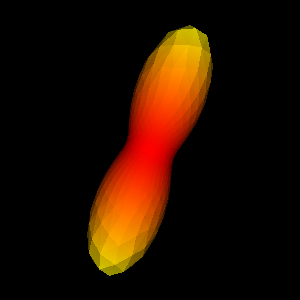

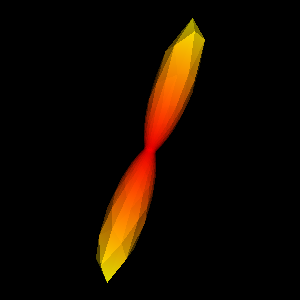

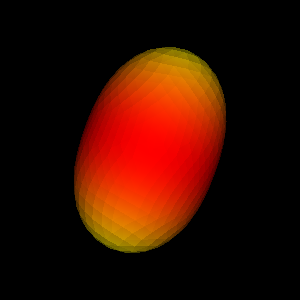

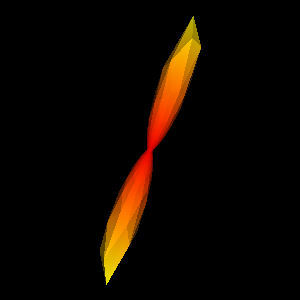

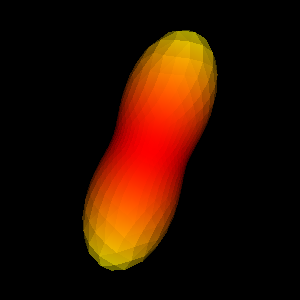

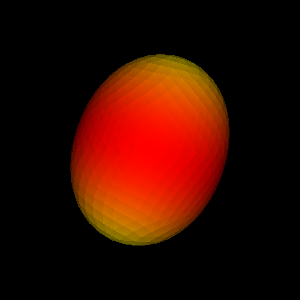

In [17]:
evecs = np.eye(3)

for ad in np.arange(0.0003, 0.0018, 0.0005):
    for rd in np.arange(0.0001, ad, 0.0005):
        this_response = [ad, rd, rd]    
        odf = vox.single_tensor_odf(gtab.bvecs, evals=this_response, 
                                evecs=np.dot(geo.rodrigues_axis_rotation([0, 0, 1], ang), evecs))
    
        ren = fvtk.ren()
        func = fvtk.sphere_funcs(odf, s724, colormap='autumn')
        fvtk.add(ren, func)
        fname = './response_func_%s_%s.png'%(ad, rd)
        fvtk.record(ren, out_path=fname)
        display(Image(filename=fname))